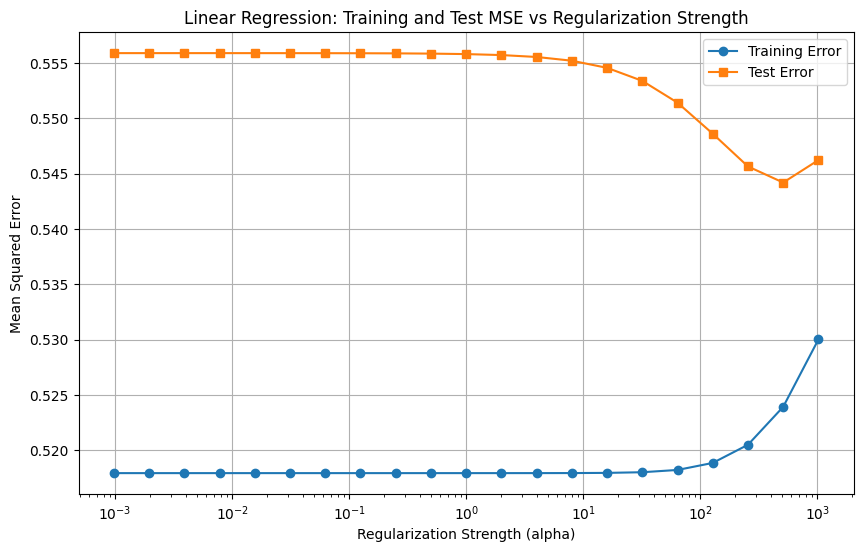

Linear Regression: Optimal regularization strength (alpha) based on test MSE: 512.0


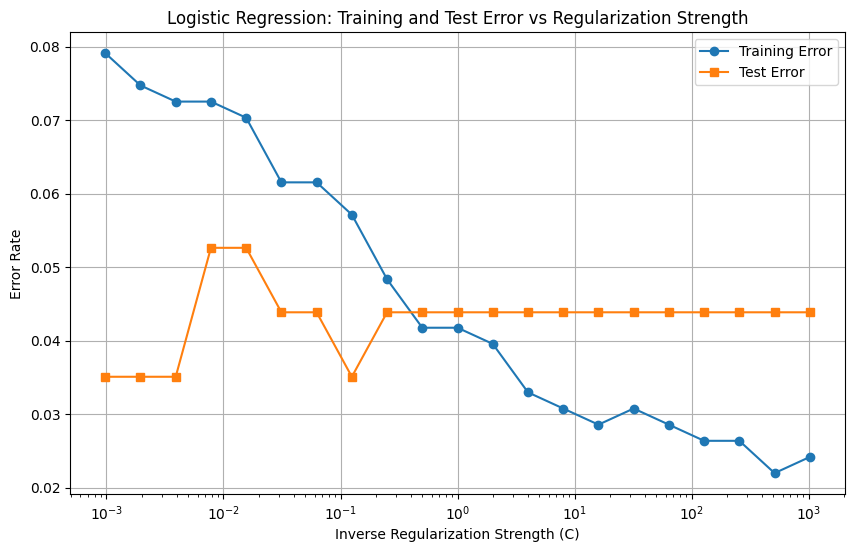

Logistic Regression: Optimal regularization strength (C) based on test error: 0.0009765625


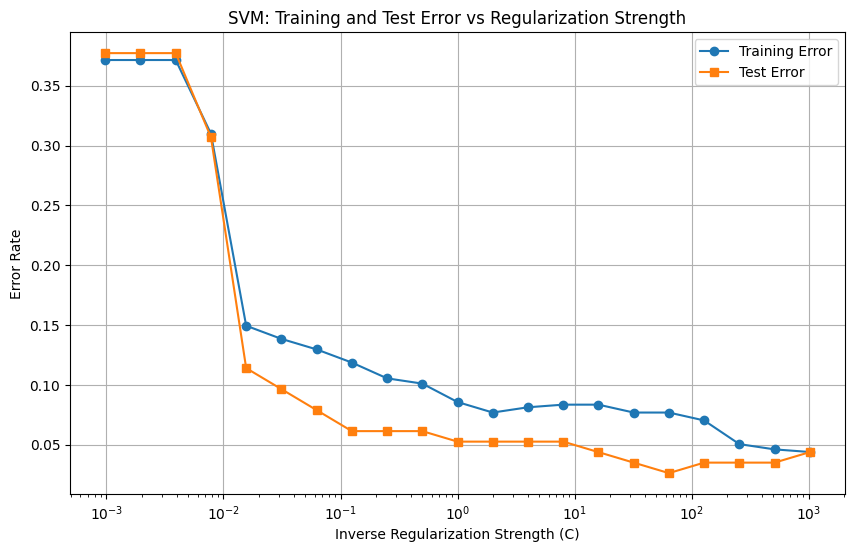

SVM: Optimal regularization strength (C) based on test error: 64.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score

# Function to plot errors
def plot_errors(alphas, train_errors, test_errors, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, train_errors, label='Training Error', marker='o')
    plt.plot(alphas, test_errors, label='Test Error', marker='s')
    plt.xscale('log')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Linear Regression on California Housing Dataset
# Load dataset
housing = fetch_california_housing()
X_housing, y_housing = housing.data, housing.target
# Split dataset
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)
# Define regularization strengths
alphas_h = 2.0 ** np.arange(-10, 11)
# Initialize lists to store errors
train_mse_h, test_mse_h = [], []
# Train model with different regularization strengths
for alpha in alphas_h:
    model = Ridge(alpha=alpha)
    model.fit(X_train_h, y_train_h)
    y_train_pred_h = model.predict(X_train_h)
    y_test_pred_h = model.predict(X_test_h)
    train_mse_h.append(mean_squared_error(y_train_h, y_train_pred_h))
    test_mse_h.append(mean_squared_error(y_test_h, y_test_pred_h))
# Plot training and test errors
plot_errors(alphas_h, train_mse_h, test_mse_h, 'Linear Regression: Training and Test MSE vs Regularization Strength',
            'Regularization Strength (alpha)', 'Mean Squared Error')
# Print optimal regularization strength
optimal_alpha_h = alphas_h[np.argmin(test_mse_h)]
print(f'Linear Regression: Optimal regularization strength (alpha) based on test MSE: {optimal_alpha_h}')

# Logistic Regression and SVM on Breast Cancer Dataset
# Load dataset
cancer = load_breast_cancer()
X_cancer, y_cancer = cancer.data, cancer.target
# Split dataset
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)
# Define regularization strengths (inverse for Logistic Regression and SVM)
Cs_c = 2.0 ** np.arange(-10, 11)

# Logistic Regression
train_acc_lr, test_acc_lr = [], []
# Train model with different regularization strengths
for C in Cs_c:
    model = LogisticRegression(C=C, solver='liblinear')
    model.fit(X_train_c, y_train_c)
    y_train_pred_c = model.predict(X_train_c)
    y_test_pred_c = model.predict(X_test_c)
    train_acc_lr.append(1 - accuracy_score(y_train_c, y_train_pred_c))
    test_acc_lr.append(1 - accuracy_score(y_test_c, y_test_pred_c))
# Plot training and test errors
plot_errors(Cs_c, train_acc_lr, test_acc_lr, 'Logistic Regression: Training and Test Error vs Regularization Strength',
            'Inverse Regularization Strength (C)', 'Error Rate')
# Print optimal regularization strength
optimal_C_lr = Cs_c[np.argmin(test_acc_lr)]
print(f'Logistic Regression: Optimal regularization strength (C) based on test error: {optimal_C_lr}')

# Support Vector Machine
train_acc_svm, test_acc_svm = [], []
# Train model with different regularization strengths
for C in Cs_c:
    model = SVC(C=C)
    model.fit(X_train_c, y_train_c)
    y_train_pred_c = model.predict(X_train_c)
    y_test_pred_c = model.predict(X_test_c)
    train_acc_svm.append(1 - accuracy_score(y_train_c, y_train_pred_c))
    test_acc_svm.append(1 - accuracy_score(y_test_c, y_test_pred_c))
# Plot training and test errors
plot_errors(Cs_c, train_acc_svm, test_acc_svm, 'SVM: Training and Test Error vs Regularization Strength',
            'Inverse Regularization Strength (C)', 'Error Rate')
# Print optimal regularization strength
optimal_C_svm = Cs_c[np.argmin(test_acc_svm)]
print(f'SVM: Optimal regularization strength (C) based on test error: {optimal_C_svm}')
